## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key


1. Open account settings.

2. Scroll down to API and click Create New API Token.

3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=d52672194ec8590cfc79db4f02bf1a296690b48f22cb82ae9601c4c95dc29164
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found exis

### Setup Kaggle API Key

In [ ]:
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import json
kaggle_username = "..." # Enter your kaggle username
kaggle_key = "..." # Enter your kaggle key

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 49.7MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Min/Max/Varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train2 = train.copy() #Make a copy of the dataframe

In [ ]:
train2.drop(['casual', 'registered'], axis=1, inplace=True) #Drop the columns which need to be ignored

In [ ]:
train2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error", problem_type="regression").fit(train2, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20230616_073506/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230616_073506/"
AutoGluon Version:  0.8.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   85.25 GB / 115.66 GB (73.7%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12207.02 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gener

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20230615_055038/")

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.785509      10.139579  517.942222                0.000851           0.666685            3       True         15
1   RandomForestMSE_BAG_L2  -53.375822       9.045417  416.281031                0.482623          26.084016            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.833377       9.215803  396.518348                0.653008           6.321333            2       True         14
3          LightGBM_BAG_L2  -54.989349       8.914607  411.986521                0.351812          21.789506            2       True         11
4          CatBoost_BAG_L2  -55.459997       8.651284  463.080681                0.088490          72.883667            2       True         13
5        LightGBMXT_BAG_L2  -60.134616      12.358875  435.397008         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    24.364277
1    42.724602
2    46.785351
3    49.469978
4    51.875694
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.all(axis=0, bool_only=None)
for i in range (0,5):
  if (predictions[i] < 0):
    print('All values in' ,i,'column are negative')
  else:
    print('All values in' ,i, 'column are positive')


All values in 0 column are positive
All values in 1 column are positive
All values in 2 column are positive
All values in 3 column are positive
All values in 4 column are positive


In [ ]:
predictions.describe()

count    6493.000000
mean      100.760147
std        90.200195
min         3.063647
25%        20.775900
50%        63.580688
75%       168.572693
max       365.284332
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
None

In [ ]:
# Set them to zero

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 918kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-06-15 09:52:20  first raw submission  complete  1.80594      1.80594       


#### Initial score of `1.80594`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

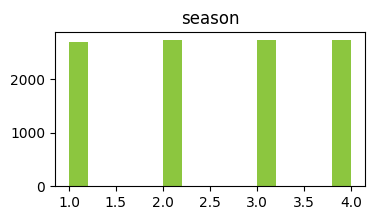

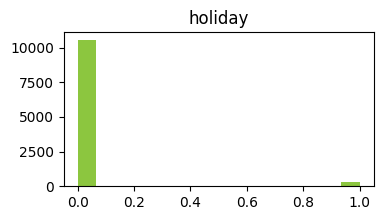

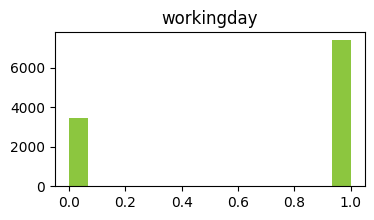

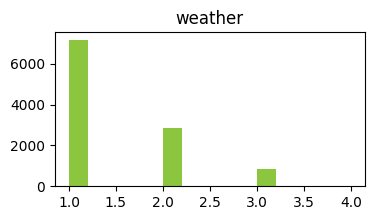

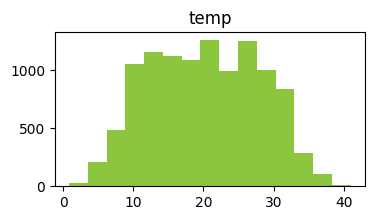

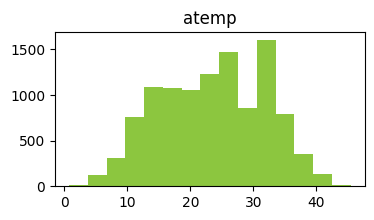

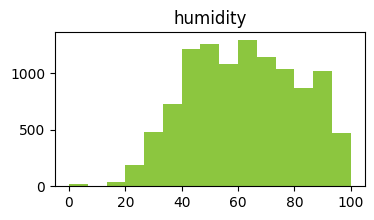

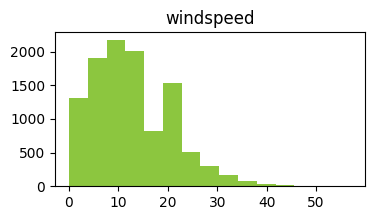

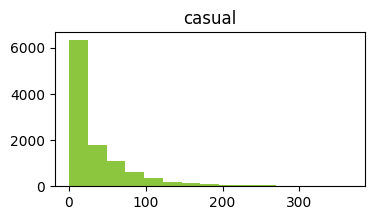

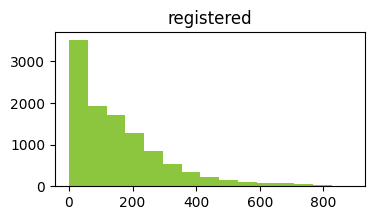

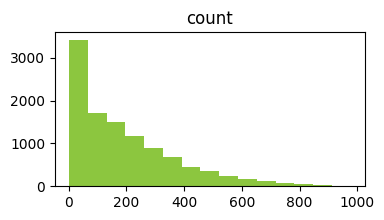

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
cols = ["season",	"holiday",	"workingday",	"weather",	"temp",	"atemp",	"humidity",	"windspeed"	,"casual"	,"registered"	,"count"]
for i in cols:
  train.hist(column=i, bins=15, grid=False, figsize=(4,2), color='#8cc63f')

In [ ]:
# Feature Engineeing
# Create a new feature
train["environment"] = train['atemp']	- train['temp']	+ train['weather']	+ train['humidity']	+ train['windspeed']
test["environment"] = test['atemp']	- test['temp']	+ test['weather']	+ test['humidity']	+ test['windspeed']

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,environment
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,86.555
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,85.615
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,85.615
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,80.555
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,80.555


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"].infer_objects()
train["weather"].infer_objects()
test["season"].infer_objects()
test["weather"].infer_objects()

0       1
1       1
2       1
3       1
4       1
       ..
6488    2
6489    2
6490    1
6491    1
6492    1
Name: weather, Length: 6493, dtype: int64

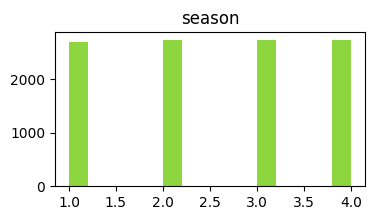

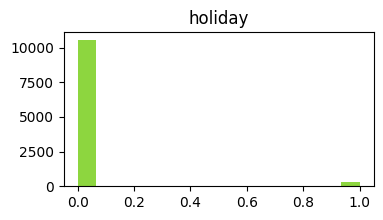

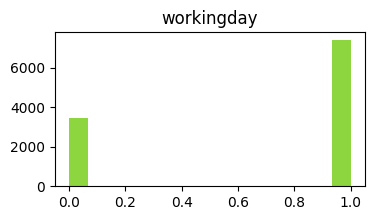

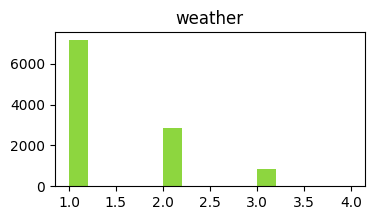

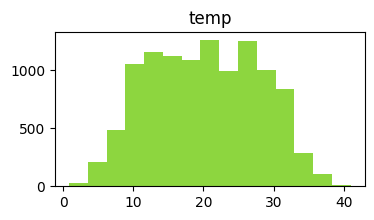

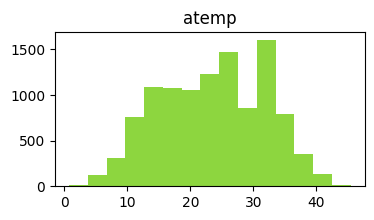

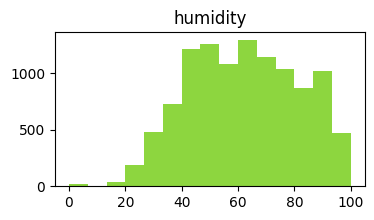

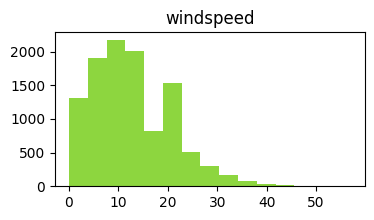

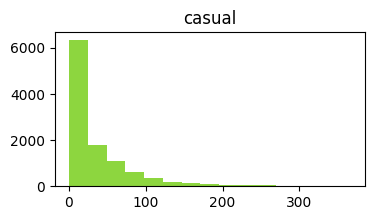

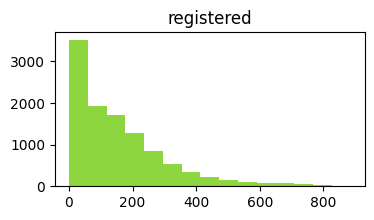

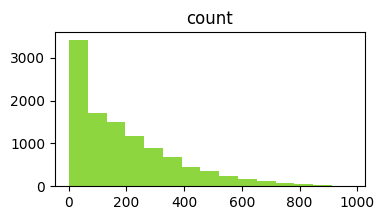

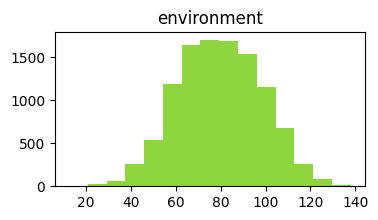

In [ ]:
# View histogram of all features again now with the hour feature
cols = ["season",	"holiday",	"workingday",	"weather",	"temp",	"atemp",	"humidity",	"windspeed"	,"casual"	,"registered"	,"count", "environment"]
for i in cols:
  train.hist(column=i, bins=15, grid=False, figsize=(4,2), color='#8dd63f')

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
train3 = train.copy()
train3.drop(['casual', 'registered'], axis=1, inplace=True) #Drop the columns which need to be ignored
train3.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,environment
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,86.555
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,85.615
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,85.615
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,80.555
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,80.555


In [ ]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error", problem_type="regression").fit(train3, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20230616_074738/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230616_074738/"
AutoGluon Version:  0.8.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   84.01 GB / 115.66 GB (72.6%)
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11508.14 MB
	Train Data (Original)  Memory Usage: 1.61 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gene

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.101507       9.886683  452.415320                0.002662           0.792459            3       True         16
1   RandomForestMSE_BAG_L2  -53.652136       8.974791  423.720368                0.518593          33.791948            2       True         13
2     ExtraTreesMSE_BAG_L2  -54.200712       9.042630  396.735090                0.586432           6.806670            2       True         15
3          LightGBM_BAG_L2  -55.216944       8.778996  411.024243                0.322798          21.095823            2       True         12
4          CatBoost_BAG_L2  -56.022872       8.514759  448.259606                0.058560          58.331186            2       True         14
5        LightGBMXT_BAG_L2  -61.614061      12.687982  441.294690         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_

In [ ]:
newpredictions = predictor_new_features.predict(test)
newpredictions.head()

0    22.074652
1    40.572323
2    45.825237
3    47.211864
4    50.959023
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
# Describe the `predictions` series to see if there are any negative values
newpredictions.all(axis=0, bool_only=None)
for i in range (0,5):
  if (newpredictions[i] < 0):
    print('All values in' ,i,'column are negative')
  else:
    print('All values in' ,i, 'column are positive')


All values in 0 column are positive
All values in 1 column are positive
All values in 2 column are positive
All values in 3 column are positive
All values in 4 column are positive


In [ ]:
newpredictions.describe()

count    6493.000000
mean      100.620758
std        90.221527
min         2.985757
25%        19.805801
50%        63.171951
75%       170.348892
max       363.494843
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features["count"] = newpredictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 962kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-15 10:51:26  new features          complete  1.81088      1.81088       
submission.csv               2023-06-15 09:52:20  first raw submission  complete  1.80594      1.80594       


#### New Score of ` 1.81088`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
from autogluon.common import space

nn_options = {
    'num_epochs': 12,
    'learning_rate': 0.2,
    'activation':space.Categorical('relu','softmax')
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': space.Int(lower=26, upper=66, default=36),
}

hyperparameters = {
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
}

In [ ]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train3, presets='best_quality', hyperparameters=hyperparameters, num_bag_folds=3, num_bag_sets=1, num_stack_levels=2,
                                                                                                                          hyperparameter_tune_kwargs={'num_trails': 5, 'searcher': 'auto', 'scheduler':'local'}, time_limit=600)

Fitted model: NeuralNetTorch_BAG_L3/ce4e233c ...
	-263.6493	 = Validation score   (-root_mean_squared_error)
	22.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L3/0ea63dff ...
	-263.2887	 = Validation score   (-root_mean_squared_error)
	28.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L4 ... Training model for up to 360.0s of the 17.88s of remaining time.
	-136.0045	 = Validation score   (-root_mean_squared_error)
	0.84s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 583.01s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230619_080753/")


In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  KNeighborsDist_BAG_L1  -84.125061       0.000089  0.078359                0.000089           0.078359            1       True          2
1    WeightedEnsemble_L2  -84.125061       0.000645  0.201841                0.000555           0.123482            2       True          3
2  KNeighborsUnif_BAG_L1 -101.546199       0.000151  0.080447                0.000151           0.080447            1       True          1
Number of models trained: 3
Types of models trained:
{'StackerEnsembleModel_KNN', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])                : 4 | ['temp', 'atemp', 'windspeed', 'environment']
('int', [])                  : 3 | ['season', 'weather

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'WeightedEnsemble_L2': -84.12506123181602},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230616_083623/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG_L1': 'AutogluonModels/ag-20230616_083623/models/KNeighborsDist_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230616_083623/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.08044672012329102,
  'KNeighborsDist_BAG_L1': 0.07835936546325684,
  'WeightedEnsemble_L2': 0.12348175048828125},
 'model_pred_times': {'KNeighborsUnif_BAG_L1': 0.00015091896057128906,
  'KNeighborsDist_BAG_L1': 8.940696716308594e-05,
  'WeightedEnsemble_L2': 0.00055527687072753

In [ ]:
hpopredictions = predictor_new_hpo.predict(test)
hpopredictions.head()

0    74.318375
1    54.665123
2    54.665123
3    65.801125
4    65.801125
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
hpopredictions.all(axis=0, bool_only=None)
for i in range (0,5):
  if (hpopredictions[i] < 0):
    print('All values in' ,i,'column are negative')
  else:
    print('All values in' ,i, 'column are positive')

All values in 0 column are positive
All values in 1 column are positive
All values in 2 column are positive
All values in 3 column are positive
All values in 4 column are positive


In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo["count"] = hpopredictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 89.7kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-19 08:18:01  new features with hyperparameters  complete  1.31074      1.31074       
submission_new_hpo.csv       2023-06-16 08:38:46  new features with hyperparameters  complete  1.84672      1.84672       
submission_new_features.csv  2023-06-15 10:51:26  new features                       complete  1.81088      1.81088       
submission.csv               2023-06-15 09:52:20  first raw submission               complete  1.80594      1.80594       


#### New Score of `1.31074  `

## Step 7: Write a Report

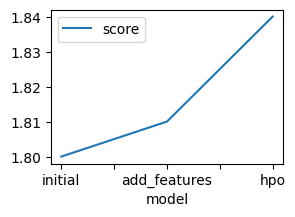

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.80, 1.81, 1.84]
    }
).plot(x="model", y="score", figsize=(3, 2)).get_figure()
fig.savefig('model_train_score.png')

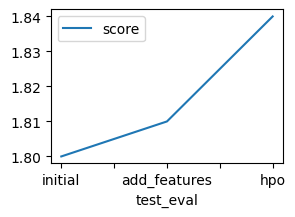

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80, 1.81, 1.84]
    }
).plot(x="test_eval", y="score", figsize=(3,2)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "hpomodel": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [1.80, 1.81, 1.84]
})